# Basic Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example Usage

In [2]:
import PersonalMLP
import Util

## Load CIFAR-10 Dataset
Source:
    https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
    
The following data is already normalized and label are one-hot-encoded.

In [3]:
X_train, y_train, X_valid, y_valid, X_test, y_test = Util.load_data()

## Initilize the Model

In [4]:
# firstly set up a config
config = PersonalMLP.Config()

In [5]:
# directly call it display the configs
config()

--------------- This display the configuration hyperparameter, change it direclty ---------------
self.layer_specs: [3072, 128, 10]
self.activation: tanh
self.learning_rate: 0.01
self.batch_size: 128
self.epochs: 100
self.early_stop: True
self.early_stop_threshold: 5
self.L1_constant: 0
self.L2_constant: 0
self.momentum: False
self.momentum_gamma: 0.9


In [6]:
# slightly tuned hyperparameters
config.activation = 'ReLU'
config.momentum = True
config.momentum_gamma =0.5
config.L1_constant = 0.000001
config.L2_constant = 0.000001
config()

--------------- This display the configuration hyperparameter, change it direclty ---------------
self.layer_specs: [3072, 128, 10]
self.activation: ReLU
self.learning_rate: 0.01
self.batch_size: 128
self.epochs: 100
self.early_stop: True
self.early_stop_threshold: 5
self.L1_constant: 1e-06
self.L2_constant: 1e-06
self.momentum: True
self.momentum_gamma: 0.5


In [7]:
# set up the model
model = PersonalMLP.Model(config)

In [8]:
%%time
# train the model on the dataset
statistics = model.train(X_train, y_train, X_valid, y_valid)

CPU times: total: 49.6 s
Wall time: 49.6 s


## Plot the Training Statistics 

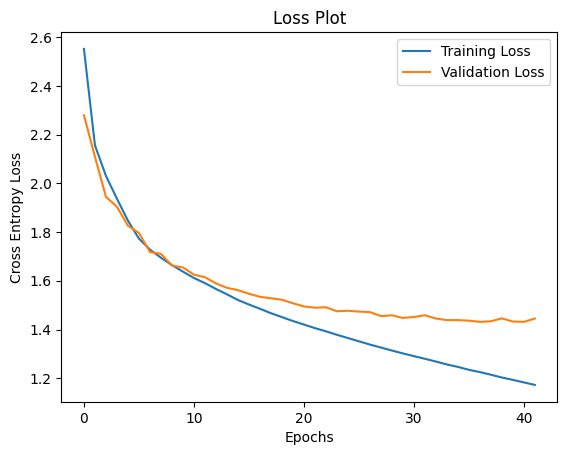

In [9]:
# loss plot
train_loss = statistics['train_loss']
validation_loss = statistics['validation_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='upper right')

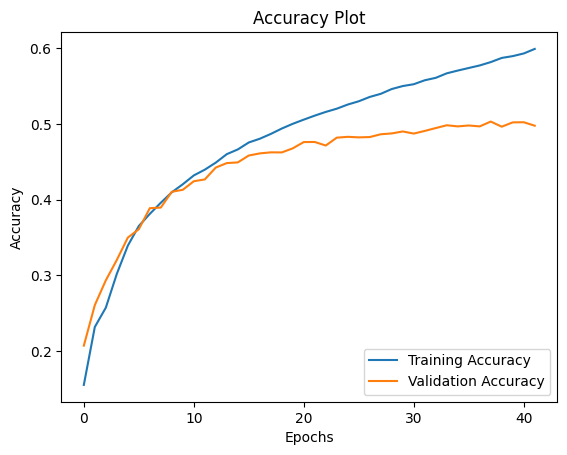

In [10]:
# accuracy plot
train_loss = statistics['train_accuracy']
validation_loss = statistics['validation_accuracy']

plt.plot(train_loss, label='Training Accuracy')
plt.plot(validation_loss, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Final Result on Test Data

In [11]:
y_test_pred = model.forward(X_test)
y_test_decode = Util.one_hot_decode(y_test)

In [15]:
# print the accuracy
np.mean(y_test_pred == y_test_decode)

0.49

In [16]:
del(model)
del(X_train)
del(y_train)
del(X_valid)
del(y_valid) 
del(X_test) 
del(y_test)

## Example: MNIST 

datasource: OpenML dataset: https://www.openml.org/search?type=data&status=active&id=554

Helper Function from Scikit Learn 

### Load Data

In [3]:
# obtain the MNIST-784 Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [38]:
def normalize(X, axis=1):
    
    mu = np.mean(X, axis=axis)
    sd = np.std(X, axis=axis)
    mu = mu.reshape(-1, 1)
    sd = sd.reshape(-1, 1)
    return (X-mu)/sd
    

In [39]:
# dataset and into correct format
X, y = mnist['data'], mnist['target']
X, y = X.to_numpy(), y.to_numpy(dtype='int')

# data preprocess
X = normalize(X)
y = Util.one_hot_encode(y)

In [40]:
def dataset_split(X, y):
    shuffler = np.random.permutation(len(X))
    X, y = X[shuffler,], y[shuffler,]
    
    X_train, X_val, X_test = X[:55000], X[55000:65000], X[65000:]
    y_train, y_val, y_test = y[:55000], y[55000:65000], y[65000:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [41]:
X_train, y_train, X_val, y_val, X_test, y_test = dataset_split(X, y)

### Set up Model

In [42]:
config = PersonalMLP.Config()
config()

--------------- This display the configuration hyperparameter, change it direclty ---------------
self.layer_specs: [3072, 128, 10]
self.activation: tanh
self.learning_rate: 0.01
self.batch_size: 128
self.epochs: 100
self.early_stop: True
self.early_stop_threshold: 5
self.L1_constant: 0
self.L2_constant: 0
self.momentum: False
self.momentum_gamma: 0.9


In [43]:
config.layer_specs = [784, 128, 10]
config.activation = 'ReLU'
config()

--------------- This display the configuration hyperparameter, change it direclty ---------------
self.layer_specs: [784, 128, 10]
self.activation: ReLU
self.learning_rate: 0.01
self.batch_size: 128
self.epochs: 100
self.early_stop: True
self.early_stop_threshold: 5
self.L1_constant: 0
self.L2_constant: 0
self.momentum: False
self.momentum_gamma: 0.9


In [44]:
model = PersonalMLP.Model(config)

In [45]:
%%time
# train the model on the dataset
statistics = model.train(X_train, y_train, X_val, y_val)

CPU times: total: 1min 21s
Wall time: 1min 21s


## Plots of Training Procedure

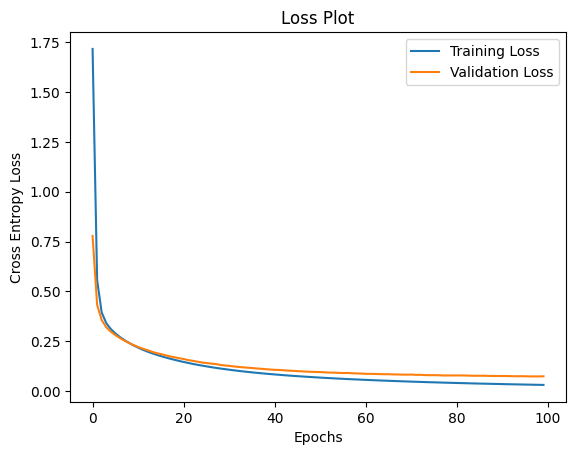

In [47]:
# loss plot
train_loss = statistics['train_loss']
validation_loss = statistics['validation_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='upper right')

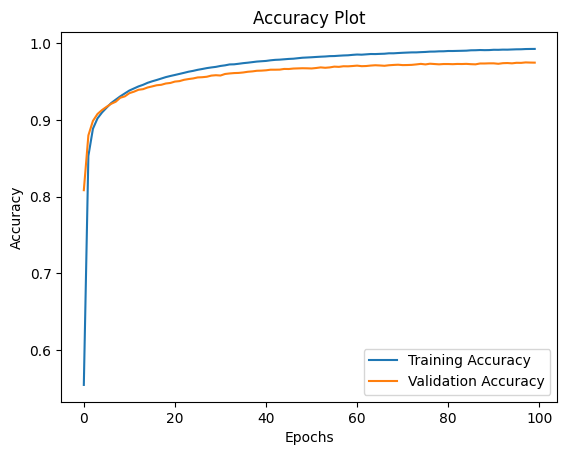

In [48]:
# accuracy plot
train_loss = statistics['train_accuracy']
validation_loss = statistics['validation_accuracy']

plt.plot(train_loss, label='Training Accuracy')
plt.plot(validation_loss, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Final Result on Test Data

In [49]:
y_test_pred = model.forward(X_test)
y_test_decode = Util.one_hot_decode(y_test)

In [50]:
# print the accuracy
np.mean(y_test_pred == y_test_decode)

0.9734